In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow. keras import Sequential
from tensorflow. keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow. keras. layers import Dropout
from tensorflow. keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

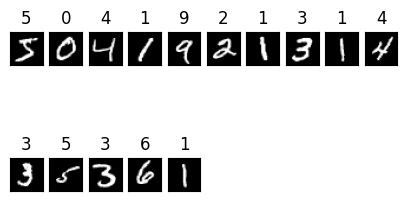

In [7]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np. squeeze (x_train [i]), cmap='gray')
 ax.set_title(y_train [i])

In [8]:
# determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [10]:
#defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D (48, (3,3), activation= 'relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout (0.5))
model.add(Flatten())
model.add(Dense (500, activation= 'relu'))
model.add(Dense (10, activation='softmax'))

c:\Users\Abrar Shah\Desktop\Folder\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
plot_model(model, 'model.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x= model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split =0.1)

Epoch 1/10
422/422 - 34s - 80ms/step - accuracy: 0.9263 - loss: 0.2400 - val_accuracy: 0.9805 - val_loss: 0.0647
Epoch 2/10
422/422 - 26s - 61ms/step - accuracy: 0.9741 - loss: 0.0824 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 3/10
422/422 - 25s - 59ms/step - accuracy: 0.9812 - loss: 0.0592 - val_accuracy: 0.9892 - val_loss: 0.0371
Epoch 4/10
422/422 - 25s - 59ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9900 - val_loss: 0.0349
Epoch 5/10
422/422 - 25s - 59ms/step - accuracy: 0.9866 - loss: 0.0414 - val_accuracy: 0.9913 - val_loss: 0.0305
Epoch 6/10
422/422 - 25s - 59ms/step - accuracy: 0.9880 - loss: 0.0369 - val_accuracy: 0.9928 - val_loss: 0.0259
Epoch 7/10
422/422 - 25s - 58ms/step - accuracy: 0.9899 - loss: 0.0313 - val_accuracy: 0.9922 - val_loss: 0.0273
Epoch 8/10
422/422 - 25s - 58ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9922 - val_loss: 0.0312
Epoch 9/10
422/422 - 25s - 58ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9923 - 

In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print (f'Accuracy: {accuracy*100}')

Accuracy: 99.3399977684021


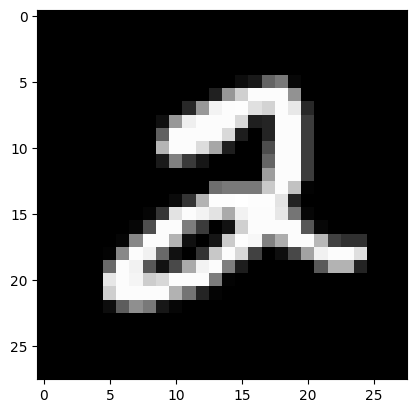

In [22]:
image = x_train [5]
#lets display the image which we want to predict
plt.imshow(np.squeeze (image), cmap='gray')
plt.show()

In [23]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted: 2
